# Table of Contents <a name="toc"></a>

1. [Task 1 - Vector fields, orbits and visualizations](#task1)
2. [Task 2 - Common bifurcations in non-linear systems](#task2)
3. [Task 3 - Bifurcations in higher dimensions](#task3)
4. [Task 4 - Chaotic systems](#task4)

# Exercise 3, task 1 - Vector fields, orbits and visualizations <a name="task1"></a>
[go to TOC](#toc)

Let us define the function that would compute the vector field for a given pair (x, alpha).

In [38]:
import numpy as np

def compute_vector_field(x, alpha):
    """
    Computes vector field for a given pair (x, alpha)
    :param x: vector x, a numpy array of dimension 2
    :param alpha: vector field parameter, float
    """
    assert type(x) == type(np.array([])) and x.size == 2, "Faulty x argument! Please provide a 2-dim numpy array"
    assert type(alpha) == float, "Faulty alpha argument. Please provide a float"
    
    matrix = np.array([alpha, alpha, -0.25, 0.0]).reshape(2, -1)
    return matrix @ x

In [39]:
compute_vector_field(np.array([1,2]), 0.1)

array([ 0.3 , -0.25])

That seems to work just fine. Let's now get down to plotting. Let's begin with the phase portraits.
Having read a bit the streamplot documentation, I realized that we are probably going to need to change our approach to computing the vector fields if we wish to visualize it. Let's take a look at this:

In [40]:
def compute_x_coordinates(X, Y, alpha):
    return X*alpha + Y*alpha

def compute_y_coordinates(X, Y, alpha):
    return X*(-0.25)    

Now we can construct the parameters for streamplot visualization.

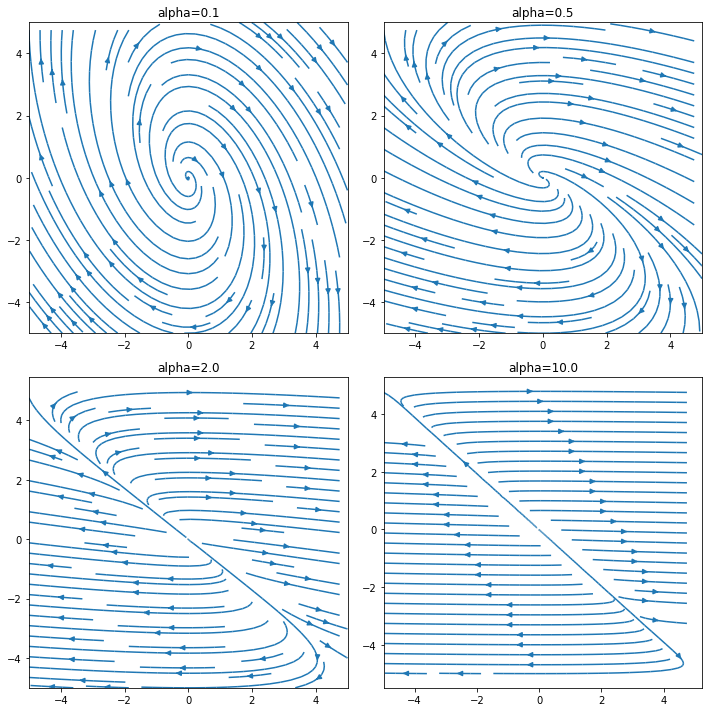

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def return_streamplot_params(alpha, gridrange):
    # define a grid for visualization
    Y, X = np.mgrid[-GRIDRANGE:GRIDRANGE:100j, -GRIDRANGE:GRIDRANGE:100j]

    # define and fill out grid values using the function created above
    X_vals = compute_x_coordinates(X, Y, alpha)
    Y_vals = compute_y_coordinates(X, Y, alpha)
    
    return X, Y, X_vals, Y_vals

# visualize streamplots
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1])

# build plots for different alphas

X, Y, X_vals, Y_vals = return_streamplot_params(0.1, 3)
ax0 = fig.add_subplot(gs[0,0])
ax0.streamplot(X, Y, X_vals, Y_vals)
ax0.set_title('alpha=0.1')

X, Y, X_vals, Y_vals = return_streamplot_params(0.5, 3)
ax0 = fig.add_subplot(gs[0,1])
ax0.streamplot(X, Y, X_vals, Y_vals)
ax0.set_title('alpha=0.5')

X, Y, X_vals, Y_vals = return_streamplot_params(2.0, 3)
ax0 = fig.add_subplot(gs[1,0])
ax0.streamplot(X, Y, X_vals, Y_vals)
ax0.set_title('alpha=2.0')

X, Y, X_vals, Y_vals = return_streamplot_params(10.0, 3)
ax0 = fig.add_subplot(gs[1,1])
ax0.streamplot(X, Y, X_vals, Y_vals)
ax0.set_title('alpha=10.0')

plt.tight_layout()
plt.show()

These look really nice. And they correspond well with the plots provided in the exercise sheet.
Are these systems topologically equivalent? Let us find the equations for their orbits (trajectories):
$$\begin{cases} \dot{x_1} = \alpha x_1 + \alpha x_2 \\ \dot{x_2} = -0.25x_1\end{cases}$$
In order to solve this system of differential equations, we can apply the method of characteristical equations (a.k.a. Euler's method). The solutions of the characteristical equations for $x_2$ will be:
$$ \lambda_{1,2} = \frac{-\alpha \pm \sqrt{\alpha^2 - \alpha}}{2}$$
and the corresponding solution:
$$x_2 = C_1e^{\lambda_1t} + C2e^{\lambda_2t}$$
Bearing in mind that $\dot{x_2} = -0.25x_1$, we get
$$x_1 = -4(\lambda_1C_1e^{\lambda_1t} + \lambda_2C_2e^{\lambda_2t})$$,
bringing us to the equations for the orbits:
$$\begin{cases} x_1 = -4(\lambda_1C_1e^{\lambda_1t} + \lambda_2C_2e^{\lambda_2t}) \\ x_2 = C_1e^{\lambda_1t} + C_2e^{\lambda_2t}\end{cases}$$,
where the constants may be defined from the initial conditions. (0,0) is obviously an equilibrium.
We can immediately notice that there is a principle difference between cases where $\alpha > 1$, $\alpha = 1$ and $\alpha < 1$, as the solution for $x_2$ will be respectively of trigonometrial, exponential polynome or just exponential. Let's see what happens if $\alpha = 1$.

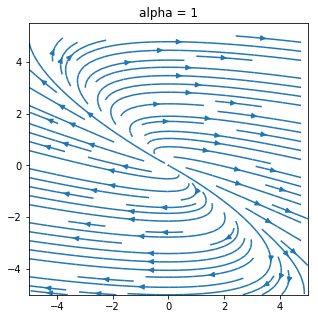

In [42]:
fig2 = plt.figure(figsize=(5,5))
X, Y, X_vals, Y_vals = return_streamplot_params(1, 3)
plt.streamplot(X, Y, X_vals, Y_vals)
plt.title("alpha = 1")
plt.show()

Actually, pretty similar to $\alpha=2$ and $\alpha=10$. 
Let's make a brief summary. 


$$\alpha < 1:\begin{cases} x_1 = -4(\lambda_1C_1e^{\lambda_1t} + \lambda_2C_2e^{\lambda_2t}) \\ x_2 = C_1e^{\lambda_1t} + C_2e^{\lambda_2t}\end{cases}$$

$$\alpha = 1:\begin{cases} x_1 = -4(C_1 - C_1\frac{t}{2} - \frac{C_2}{2})e^{-\frac{t}{2}} \\ x_2 = (C_1t + C_2)e^{-t/2} \end{cases}$$

$$\alpha > 1:\begin{cases} x_1 = -4(C_2\lambda_2cos(\lambda_2t) - C_1\lambda_1sin(\lambda_1t)) \\ x_2 = C_1cos(\lambda_1t) + C_2sin(\lambda_2t) \end{cases}$$
Everywhere, 
$$ \lambda_{1,2} = \frac{-\alpha \pm \sqrt{\alpha^2 - \alpha}}{2}$$

# Exercise 3, task 2 - Common bifurcations in non-linear systems <a name="task2"></a>
[got to TOC](#toc)

Let's write some useful functions

In [62]:
def system_u(x, alpha):
    """
    computes system's vector field in point x for a given alpha
    """
    return alpha - x**2

def system_u2(x, alpha):
    """
    same thing, but for the second equation from the task
    """
    return alpha - 2*x**2 - 2

As shown in lectures, we will plot the the connection between $x_0$ and the value of the parameter. First, we have this equation: 
$$ \dot{x} = \alpha - x^2$$
So, for $x = \pm\sqrt{\alpha}$ our object will be stable (if $\alpha$ is positive). For negative values of the parameter, no stable states for us. 
From the lecture we know that this is called a "Saddle-node" bifurcation. 

Let us first try to get the phase portraits we saw.

<Figure size 432x288 with 0 Axes>

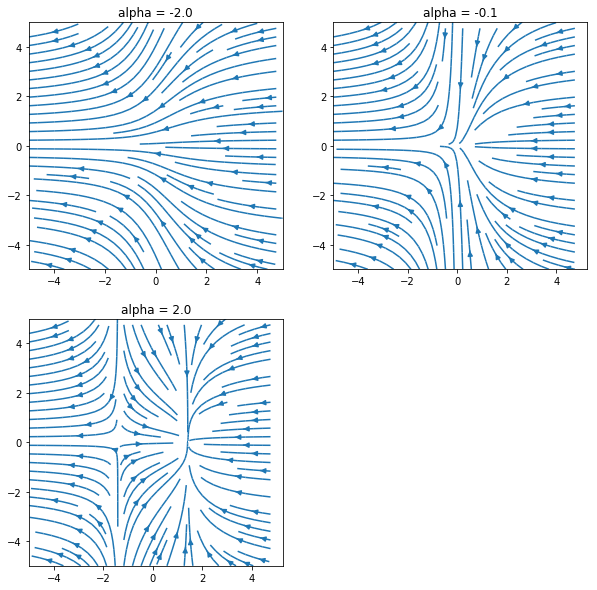

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def compute_x_task2(X, Y, alpha):
    return alpha-X**2

def compute_y_task2(X, Y, alpha):
    return -Y


def return_streamplot_params_task2(alpha, gridrange):
    # define a grid for visualization
    Y, X = np.mgrid[-GRIDRANGE:GRIDRANGE:100j, -GRIDRANGE:GRIDRANGE:100j]

    # define and fill out grid values using the function created above
    X_vals = compute_x_task2(X, Y, alpha)
    Y_vals = compute_y_task2(X, Y, alpha)
    
    return X, Y, X_vals, Y_vals


plt.clf()
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1])
alphas = [-2.0, -0.1, 2.0]
for alpha in alphas:
    ax0 = fig.add_subplot(gs[int(alphas.index(alpha)/2), alphas.index(alpha)%2])
    X, Y, X_vals, Y_vals = return_streamplot_params_task2(alpha, 1)
    ax0.streamplot(X, Y, X_vals, Y_vals)
    ax0.set_title("alpha = " + str(alpha))
plt.show()

Looks good. Now, let's move on to the bifurcation diagrams. First, let us reproduce the ones we saw in lectures.

<Figure size 432x288 with 0 Axes>

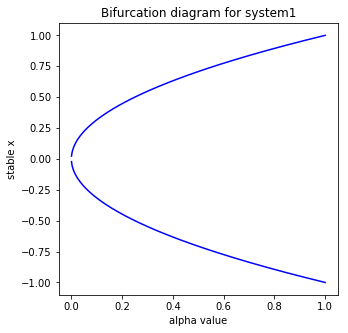

In [105]:
import numpy as np
import matplotlib.pyplot as plt

n_steps = 2000
alphas = np.linspace(-1, 1, n_steps)

stable_points_sys1 = np.array([np.sqrt(elem) if elem >= 0 else np.nan for elem in alphas]) 
stable_points_sys1_neg = np.array([-np.sqrt(elem) if elem > 0 else np.nan for elem in alphas]) 

plt.clf()
plt.figure(figsize = (5,5))
plt.plot(alphas, stable_points_sys1, "b")
plt.plot(alphas, stable_points_sys1_neg, "b")
plt.title("Bifurcation diagram for system1")
plt.xlabel("alpha value")
plt.ylabel("stable x")
plt.show()

We have to note that for the second system for $\alpha \in (-1,1)$ there are no stable states. Indeed, for any alpha from that interval, $\dot{x} = \alpha - x^2 - 2 < 0$. So, we need to expand our graph a little if we wish to see something interesting.

<Figure size 432x288 with 0 Axes>

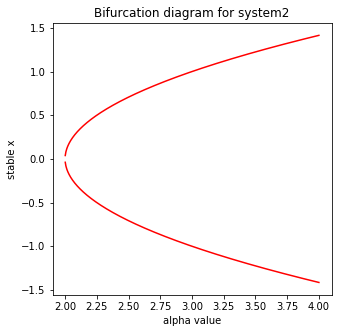

In [107]:
n_steps = 2000
alphas = np.linspace(-1, 4, n_steps)

stable_points_sys2 = np.array([np.sqrt(elem-2) if elem-2 > 0 else np.nan for elem in alphas]) 
stable_points_sys2_neg = np.array([-np.sqrt(elem-2) if elem-2 > 0 else np.nan for elem in alphas]) 

plt.clf()
plt.figure(figsize = (5,5))
plt.plot(alphas, stable_points_sys2, "r")
plt.plot(alphas, stable_points_sys2_neg, "r")
plt.title("Bifurcation diagram for system2")
plt.xlabel("alpha value")
plt.ylabel("stable x")
plt.show()

Finally, let's put these guys on the same plot.

<Figure size 432x288 with 0 Axes>

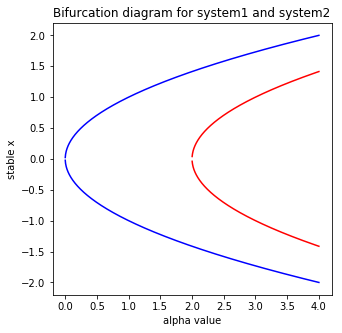

In [106]:
import numpy as np
import matplotlib.pyplot as plt

n_steps = 2000
alphas = np.linspace(-1, 4, n_steps)

stable_points_sys1 = np.array([np.sqrt(elem) if elem > 0 else np.nan for elem in alphas]) 
stable_points_sys1_neg = np.array([-np.sqrt(elem) if elem > 0 else np.nan for elem in alphas]) 

stable_points_sys2 = np.array([np.sqrt(elem-2) if elem-2 > 0 else np.nan for elem in alphas]) 
stable_points_sys2_neg = np.array([-np.sqrt(elem-2) if elem-2 > 0 else np.nan for elem in alphas]) 

plt.clf()
plt.figure(figsize = (5,5))
plt.plot(alphas, stable_points_sys1, "b")
plt.plot(alphas, stable_points_sys1_neg, "b")
plt.plot(alphas, stable_points_sys2, "r")
plt.plot(alphas, stable_points_sys2_neg, "r")
plt.title("Bifurcation diagram for system1 and system2")
plt.xlabel("alpha value")
plt.ylabel("stable x")
plt.show()

There is way we could actually see the "stability" of the states in action. Let us simulate a few orbits and see how they evolve depending on the parameter.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


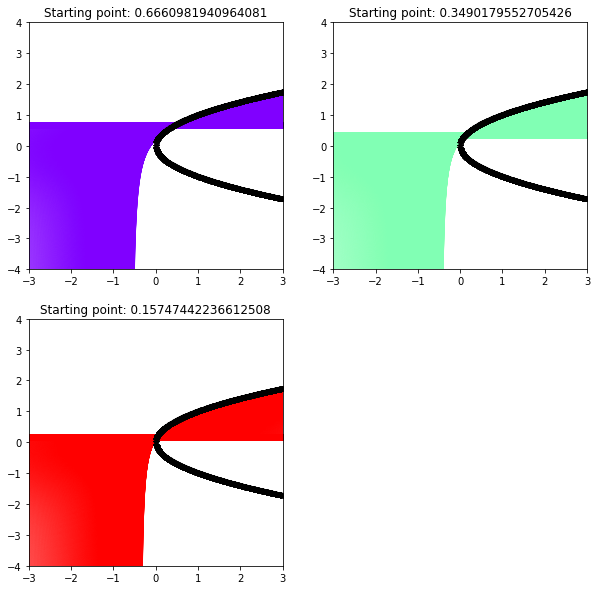

In [159]:
import numpy as np
import matplotlib.pyplot as plt

# define some control variables
n_steps = 1000
alphas = np.linspace(-3,3, n_steps)
alphasPOS = np.linspace(0, 3, n_steps/2)
alphasNEG = np.linspace(-3, 0, n_steps/2)

# we will use 100 iterations of the given function and use the last 100 to display the bifurcation map
n_sim = 3
iterations = 2000
last = 2000
# initialize initial condition
deltaT = 0.0015
# visualize
fig = plt.figure(figsize=(10,10))

n_rows = int(n_sim/2) + n_sim%2
gs = gridspec.GridSpec(nrows=n_rows, ncols=2, height_ratios=[1]*n_rows)

# initialize colour palette
colors=iter(plt.cm.rainbow(np.linspace(0,1,n_sim)))
plt.clf()
for sim in range(n_sim):
    color = next(colors)
    starting_point = np.random.uniform(-1,1)
    ax0 = fig.add_subplot(gs[int(sim/n_rows), sim%n_rows])
    x = starting_point*np.ones(n_steps)
    ax0.plot(alphas, x, marker = "v", c=color)
    for i in range(iterations):
        x = x + deltaT*system_u(x, alphas)
        if iterations - last < i:
            ax0.plot(alphas, x, c=color, alpha=0.25)
    ax0.plot(alphasPOS, np.sqrt(alphasPOS), "*k")
    ax0.plot(alphasPOS, -np.sqrt(alphasPOS), "*k")
    ax0.set_title("Starting point: " + str(starting_point))
    ax0.set_xlim((-3,3))
    ax0.set_ylim((-4,4))
plt.show()


To determine whether the systems are topologically equivalent, let us write down the equations for their orbits. First, system (6):
$$\dot{x_1} = \alpha - x^2 \rightarrow$$

$$\frac{dx}{\alpha-x^2} = dt $$
First, let $\alpha > 0$. Then, we have 
$$ \int_{x_o}^{x(t)}\frac{dx}{\alpha-x^2} = \int_{t_o}^{t}dt \rightarrow $$

$$ \frac{1}{2\sqrt{\alpha}}ln(\frac{\sqrt{\alpha}+x}{\sqrt{\alpha}-x}) |^{x(t)}_{x_o} = (t-t_o) $$
Let us consider $t_o = 0$ and set $\frac{1}{2\sqrt{\alpha}}ln(\frac{\sqrt{\alpha}+x_o}{\sqrt{\alpha}-x_o}) = C$ - a constant depending on the initial position. In that case, after some math sit-ups we get the following equation:
$$ x(t) = \frac{C\sqrt{\alpha}e^{2t\sqrt{\alpha}}-\alpha}{1-Ce^{2t\sqrt{\alpha}}} \ \ \ \ \ \ (6.1)$$
Now, let us consider $\alpha=0$. Then the we get:
$$ \dot{x} = -x^2 \rightarrow -\frac{dx}{x^2} = dt$$
and thus
$$ x(t) = \frac{x_o}{tx_o + 1} \ \ \ \ \ \ (6.2) $$
Finally, if $\alpha < 0$, we note $\beta = |\alpha|$ and get a differential equation of this kind:
$$ \dot{x} = -\beta - x^2, \beta > 0 \rightarrow -\frac{dx}{\beta + x^2} = dt $$
We can re-write it like this:
$$ \frac{1}{\beta}(-\frac{dx}{1+(x/\sqrt{\beta})^2}) = dt $$
And this solution for this is known:
$$ arcctg(\frac{x}{\sqrt{\beta}}) |^{x(t)}_{x_o} = t\beta \rightarrow$$
$$ x(t) = \sqrt{-\alpha} * ctg(-\alpha t + arcctg(x_o/\sqrt{-\alpha}))  \ \ \ \ \ \ (6.3) $$
So, (6.1), (6.2) and (6.3) give us the trajectories depending on the sign of the parameter. Let's sum up:
$$ x(t) = \begin{cases} \frac{C\sqrt{\alpha}e^{2t\sqrt{\alpha}}-\alpha}{1-Ce^{2t\sqrt{\alpha}}}, \ \  \alpha > 0 \\ \frac{x_o}{tx_o + 1}, \ \  \alpha = 0 \\ \sqrt{-\alpha} * ctg(-\alpha t + arcctg(x_o/\sqrt{-\alpha})),  \ \ \alpha < 0\end{cases} $$
What about our second equation, $\dot{x} = \alpha - 2x^2 - 2$? Let's make some adjustments:
$$ (1) \ \ \  y = \sqrt{2}x \rightarrow dy = \sqrt{2}dx \rightarrow \frac{dy}{\sqrt{2}(\alpha - y^2 - 2)} = dt$$
$$ (2) \ \ \ \beta = \alpha - 2 \rightarrow \frac{dy}{\beta - y^2} = \sqrt{2}dt $$
So basically we are facing the same problem, except the coordinate system has different scale and the "important" parameter values are shifted by 2 (the "interesting point used to be 0, now it is 2). So, I would say that according to the definition 2.14 from the Kuznetsov book, we can state that **these systems are topologically equivalent**: the transformations of both parameter and space are homeomorphisms and do not alter the flow of time. 

# Exercise 3, Task 3: Bifurcations in higher dimensions. <a name="task3"></a>
[go to TOC](#toc)

First, the phase portraits. Hopefully we will see some bifurcations here.

In [162]:
import numpy as np

def get_dot_x1(X1, X2, alpha):
    return alpha*X1 - X2 -X1*(X1**2 + X2**2)

def get_dot_x2(X1, X2, alpha):
    return X1 + alpha*X2 - X2*(X1**2 + X2**2)

def return_streamplot_params_task3(alpha, gridrange):
    # define a grid for visualization
    Y, X = np.mgrid[-GRIDRANGE:GRIDRANGE:100j, -GRIDRANGE:GRIDRANGE:100j]

    # define and fill out grid values using the function created above
    X_vals = get_dot_x1(X, Y, alpha)
    Y_vals = get_dot_x2(X, Y, alpha)
    
    return X, Y, X_vals, Y_vals

We can either think a little or look in the book. The critical regions are: $\alpha < 0$, $\alpha = 0$ and $\alpha > 0$. Let us visualize the phase portraits for these regions.

<Figure size 432x288 with 0 Axes>

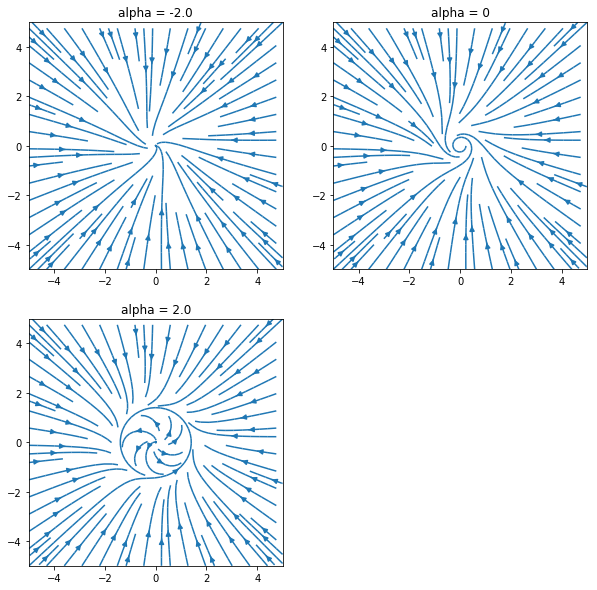

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.clf()

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1])
alphas = [-2.0, 0, 2.0]
for alpha in alphas:
    ax0 = fig.add_subplot(gs[int(alphas.index(alpha)/2), alphas.index(alpha)%2])
    X, Y, X_vals, Y_vals = return_streamplot_params_task3(alpha, 1)
    ax0.streamplot(X, Y, X_vals, Y_vals)
    ax0.set_title("alpha = " + str(alpha))
plt.show()

There we go, that looks nice. Let's compute an example of a trajectory using Euler's method. We have kind of already done that in task 2, btw.

In [216]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def get_trajectory_Hopf(alpha, x, iterations):
    deltaT = 0.001    
    xs = list()
    ys = list()
    for itr in range(iterations):
        delta = np.array([deltaT*get_dot_x1(x[0], x[1], alpha), deltaT*get_dot_x2(x[0], x[1], alpha)])
        xs.append(x[0])
        ys.append(x[1])
        x = x + delta
        
    return xs, ys
    


Text(0.5, 1.0, 'alpha=1, x0 = (0.5,0)')

<Figure size 432x288 with 0 Axes>

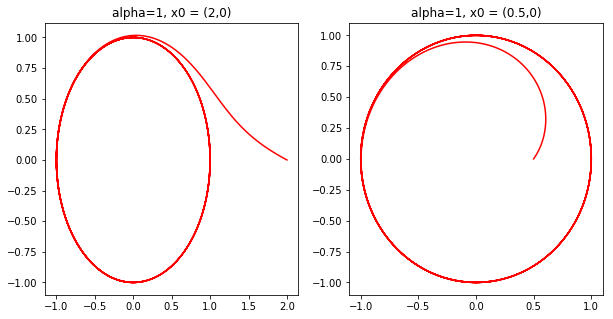

In [223]:
plt.clf()
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(nrows=1, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])
xs, ys = get_trajectory_Hopf(alpha=1, x=np.array([2.0,0.0]), iterations = 30000)
ax0.plot(xs, ys, "r")
ax0.set_title("alpha=1, x0 = (2,0)")

ax1 = fig.add_subplot(gs[0, 1])
xs, ys = get_trajectory_Hopf(alpha=1, x=np.array([0.5,0.0]), iterations = 30000)
ax1.plot(xs, ys, "r")
ax1.set_title("alpha=1, x0 = (0.5,0)")


Let's plot the vector field and the trajectory on the same axes! I feel that's gonna be awesome.

<Figure size 432x288 with 0 Axes>

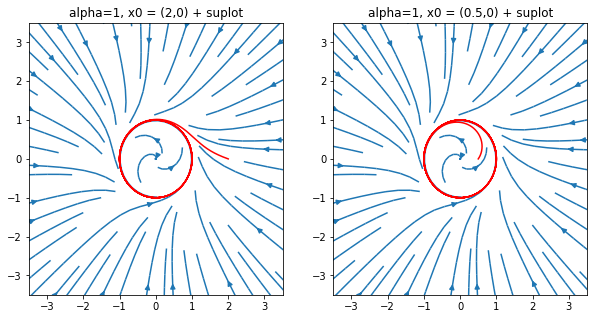

In [227]:
plt.clf()
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(nrows=1, ncols=2)

# plotting the trajectory
ax0 = fig.add_subplot(gs[0,0])
xs, ys = get_trajectory_Hopf(alpha=1, x=np.array([2.0,0.0]), iterations = 30000)
ax0.plot(xs, ys, "r")

# plotting the vector field
X, Y, X_vals, Y_vals = return_streamplot_params_task3(1, 1)
ax0.streamplot(X, Y, X_vals, Y_vals)
ax0.set_xlim((-3.5, 3.5))
ax0.set_ylim((-3.5, 3.5))
ax0.set_title("alpha=1, x0 = (2,0) + suplot")

# plotting the trajectory
ax1 = fig.add_subplot(gs[0,1])
xs, ys = get_trajectory_Hopf(alpha=1, x=np.array([0.5,0.0]), iterations = 30000)
ax1.plot(xs, ys, "r")

# plotting the vector field
X, Y, X_vals, Y_vals = return_streamplot_params_task3(1, 1)
ax1.streamplot(X, Y, X_vals, Y_vals)
ax1.set_xlim((-3.5, 3.5))
ax1.set_ylim((-3.5, 3.5))
ax1.set_title("alpha=1, x0 = (0.5,0) + suplot")

plt.show()


Beautiful. So, in the first case we start from the outside of the vortex, spiral to it, reach it and stay there.In the second one - same thing, except we begin from the inside of the vortex.

For the second part of this task, let's do some analysis first.
$$ \dot{x} = \alpha_1 + \alpha_2x - x^3 \rightarrow x \ can't \ be \ found \ analytically.$$
Ok, that's the end of our analysis. We will use numerical methods to find x's over a grid of parameter values.

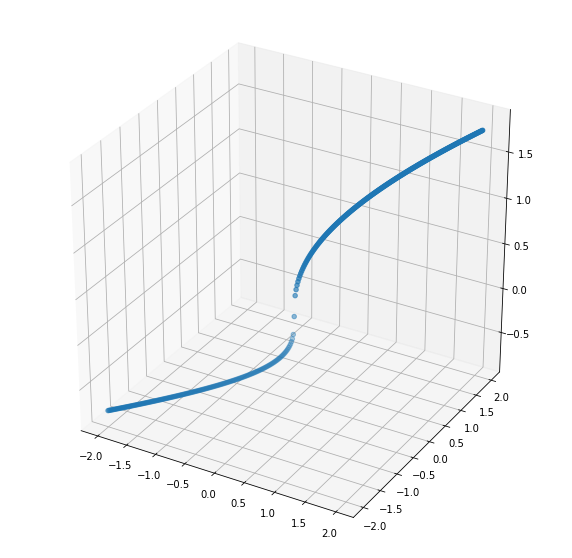

In [305]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

alphas1 = np.arange(-2, 2, 0.01)
alphas2 = np.arange(-2, 2, 0.01)

zeros = list()
for i in range(alphas1.size):
    roots = np.roots([-1.0, 0.0, alphas2[i], alphas1[i]])
    for root in roots:
        if np.iscomplex(root):
            continue
        zeros.append((alphas1[i], alphas2[i], np.real(root)))
                     
alphas1, alphas2, xs = zip(*zeros)
alphas1 = list(alphas1)
alphas2 = list(alphas2)
xs = list(xs)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(alphas1, alphas2, xs)

Looks good and weird at the same time. Doesn't feel like a 3d thing... Let's try another method.

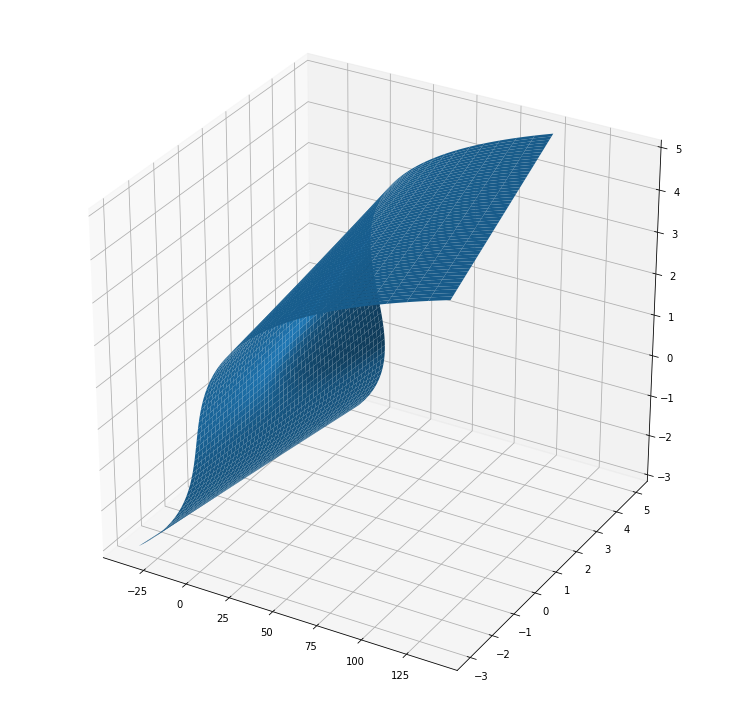

In [309]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alpha2 = np.linspace(-3,5,1000)
X = np.linspace(-3,5,1000)

X,alpha2 = np.meshgrid(X, alpha2)
alpha1 = (X**3 - alpha2*X)

fig = plt.figure(figsize=(13,13))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(alpha1, alpha2, X)

Now THAT is much prettier. Googling "cusp bifurcation" gives sorta similar images, so I will assume this is a correct picture. I would not know why this is called "cusp bifurcation" since I don't really know what 'cusp' means :)

# Exercise 3, Task 4: Chaotic Dynamics. <a name="task4"></a>
[go to TOC](#toc)

Similarly to the previous tasks, let's define some useful functions.

In [2]:
def logistic_map(x, r):
    return r*x*(1-x)

Let us now visualize the bifurcations for $r \in [0,2]$ and for $r \in [2,4]$ In order to do that, we will build corresponding bifurcation diagrams.

<Figure size 432x288 with 0 Axes>

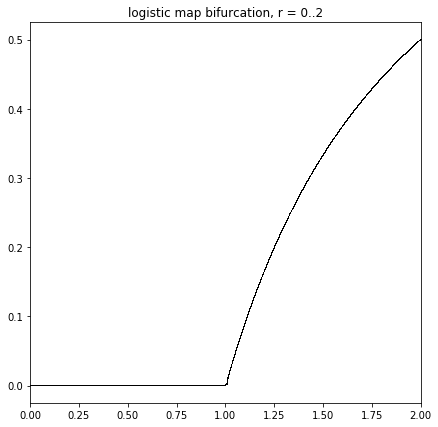

In [4]:
import numpy as np
import matplotlib.pyplot as plt

grid_points = 10000
r1 = np.linspace(0,2, grid_points)

# how many steps we will take
n_steps = 1000 

#how many steps we will plot
last = 200

#init x
x = 1e-5 * np.ones(grid_points)

plt.clf()
fig = plt.figure(figsize = (7,7))

for i in range(n_steps):
    x = logistic_map(x, r1)
    if n_steps - i <= last:
        plt.plot(r1, x, ",k", alpha = 0.2)
        
plt.xlim((0,2))
plt.title("logistic map bifurcation, r = 0..2")
plt.show()



Let's try the same thing, except take a closer look on the [0,1] interval

<Figure size 432x288 with 0 Axes>

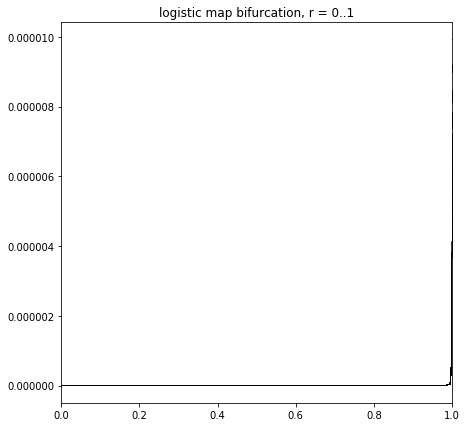

In [11]:
import numpy as np
import matplotlib.pyplot as plt

grid_points = 10000
r1 = np.linspace(0,1, grid_points)

# how many steps we will take
n_steps = 1000 

#how many steps we will plot
last = 200

#init x
x = 1e-5 * np.ones(grid_points)

plt.clf()
fig = plt.figure(figsize = (7,7))

for i in range(n_steps):
    x = logistic_map(x, r1)
    if n_steps - i <= last:
        plt.plot(r1, x, ",k", alpha = 0.2)
        
plt.xlim((0,1))
plt.title("logistic map bifurcation, r = 0..1")
plt.show()

So why are we seeing what we are seeing? Well, let's consider the logistic map function, take $r<1$ and initial x - a small value. What will the next x be? $x_{n+1} = rx_{n}(1-x_n) $. The value in the brackets is approximately 1. A little smaller, in fact. So, we can say that 
$$ x_{n+1} < rx_{n} $$
But we are considering now $r < 1$, and thus 
$$ x_{n+1} < x_{n} $$
Given initial x small, our orbit never rises higher than this inital value, even goes down to zero (not noticeable on the plot because initial value is VERY small). But does this depend on the initial x?

For $x\in[0,1]$ - obviously not. For huge values of x we basically get a quadratic dependency and the absolute value of x will quickly run away into infinity, that would not be interesting, not steady states there.

So, if we **consider only $x\in[0,1]$**, we have have a steady state any initial state will converge to with $r\in[0,1)$: x = 0.

Now let us consider $r\in[1,2]$ If we take a look at the Wikipedia article about logistic map, we will find out that in this case, independently of the point of origin, all trajectories will tend to $\frac{r-1}{r}$

With that, let us proceed to [2,4] interval.

<Figure size 432x288 with 0 Axes>

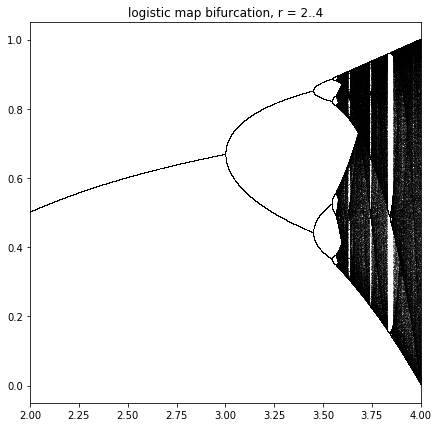

In [20]:
import numpy as np
import matplotlib.pyplot as plt

grid_points = 10000
r1 = np.linspace(2,4, grid_points)

# how many steps we will take
n_steps = 10000 

#how many steps we will plot
last = 200

#init x
x = 1e-5 * np.ones(grid_points)

plt.clf()
fig = plt.figure(figsize = (7,7))

for i in range(n_steps):
    x = logistic_map(x, r1)
    if n_steps - i <= last:
        plt.plot(r1, x, ",k")
            
plt.xlim((2,4))
plt.title("logistic map bifurcation, r = 2..4")
plt.show()

That looks cool. So the intervals of interest are obviously [2,3] and [3,4]. Back to Wikipedia. 

Turns out, for $r\in[2,3]$ the functions still tends to $\frac{r-1}{r}$. Let's show that.

<Figure size 432x288 with 0 Axes>

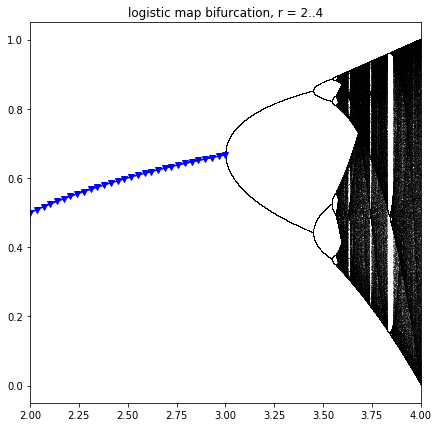

In [24]:
import numpy as np
import matplotlib.pyplot as plt

grid_points = 10000
r1 = np.linspace(2,4, grid_points)

# how many steps we will take
n_steps = 10000 

#how many steps we will plot
last = 200

#init x
x = 1e-5 * np.ones(grid_points)

plt.clf()
fig = plt.figure(figsize = (7,7))

for i in range(n_steps):
    x = logistic_map(x, r1)
    if n_steps - i <= last:
        plt.plot(r1, x, ",k")
        
r2 = np.linspace(2,3, 30)
        
plt.plot(r2, (r2-1)/r2, marker = "v", c="b")    

plt.xlim((2,4))
plt.title("logistic map bifurcation, r = 2..4")
plt.show()

There we go. According to Wikipedia, this time the values will "flactuate around this limit for some time".

On the interval [3,4], however, we see that the function approaches permanent osciallations between first 2, then 4, then 8, then... , ..., then $2^n$, then ... values. 

Let us now plot the whole interval.

<Figure size 432x288 with 0 Axes>

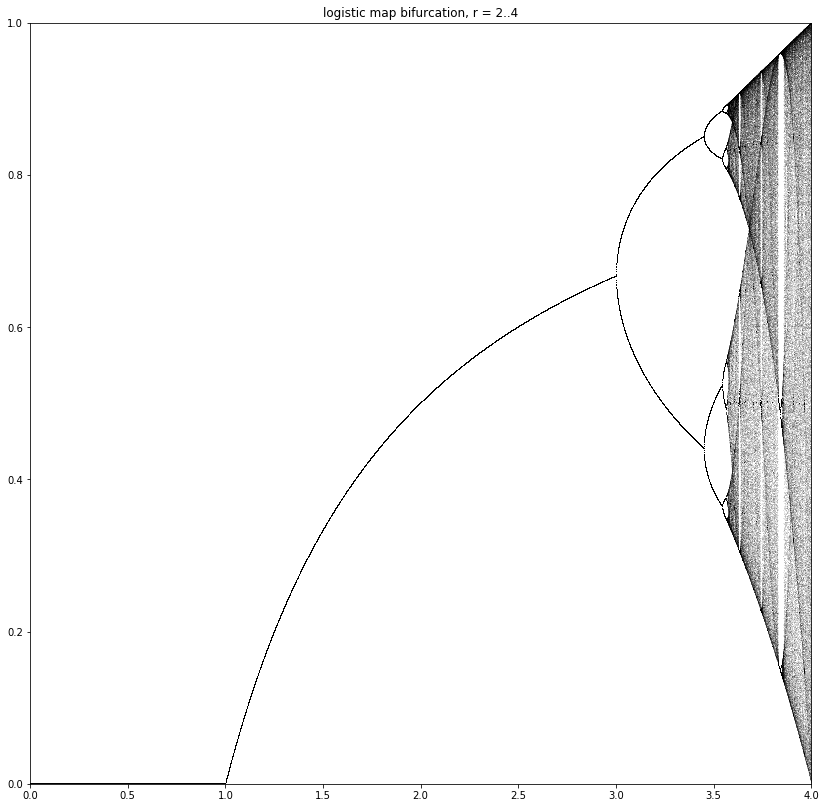

In [31]:
import numpy as np
import matplotlib.pyplot as plt

grid_points = 10000
r1 = np.linspace(0,4, grid_points)

# how many steps we will take
n_steps = 10000 

#how many steps we will plot
last = 200

#init x
x = 1e-5 * np.ones(grid_points)

plt.clf()
fig = plt.figure(figsize = (14,14))

for i in range(n_steps):
    x = logistic_map(x, r1)
    if n_steps - i <= last:
        plt.plot(r1, x, ",k", alpha = 0.1)
        
plt.xlim((0,4))
plt.ylim((0,1))
plt.title("logistic map bifurcation, r = 2..4")
plt.show()

Not really sure how to meaningfully show all the stable states, bearing in mind that they are multiplying geometrically. So, I tried giving plots high opacity, so the most visited states are better visible. Did it work? Well, kind of, I think.

Let's code the Lorenz attractor now. We are supposed to get to time 1000. That is a bit unclear, but if we read the original paper by Lorenz, we will find out that he used Euler's method with $\Delta t = 0.01$ for a 1000 iterations. So let's do that. 

In [50]:
def dot_x(X, Y, Z, sigma):
    return sigma*(-X+Y)

def dot_y(X, Y, Z, ro):
    return X*(ro-Z)-Y

def dot_z(X, Y, Z, beta):
    return X*Y - beta*Z

In [84]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
import numpy as np

def plot_Lorenz(x_init, sigma, ro, beta, ax = None, n_iter=1000):
    Xs = list()
    Ys = list()
    Zs = list()

    delta_T = 0.01
    
    x = x_init[0]
    y = x_init[1]
    z = x_init[2]


    for itr in range(n_iter):
        Xs.append(x)
        Ys.append(y)
        Zs.append(z)
        x = x + delta_T*dot_x(x, y, z, sigma)
        y = y + delta_T*dot_y(x, y, z, ro)
        z = z + delta_T*dot_z(x, y, z, beta)
        
    if ax is None:
        fig = plt.figure(figsize=(15,15))
        ax = fig.add_subplot()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(Xs, Ys, Zs)
    else:
        ax.scatter(Xs, Ys, Zs)
    return ax

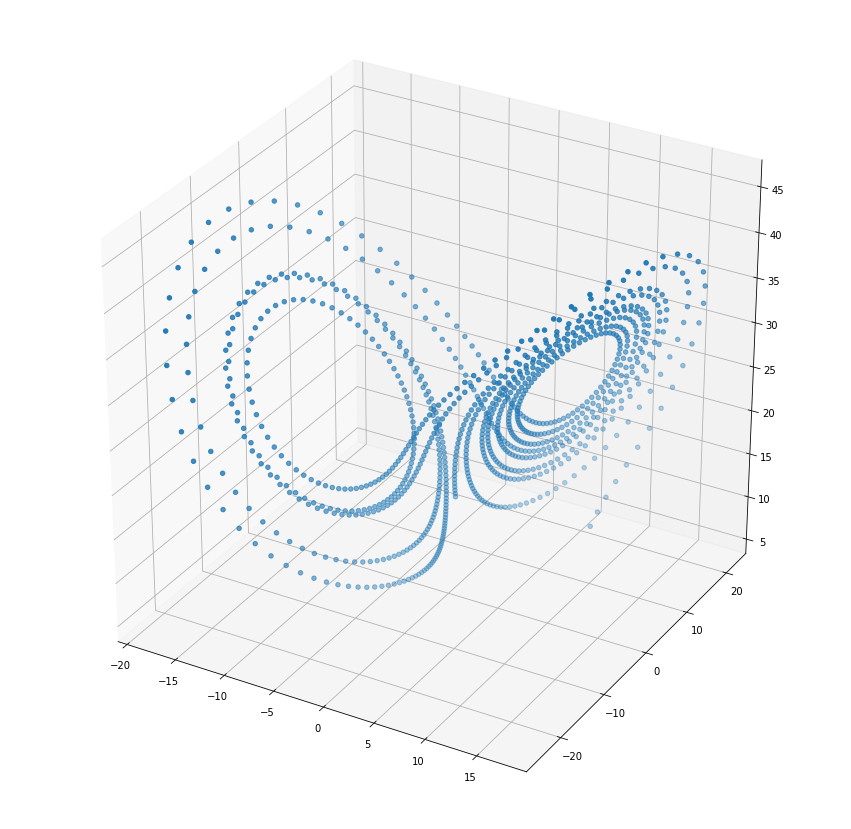

In [85]:
plot_Lorenz([10,10,10], 10, 28, 8/3)

That. Is. COOL. Let's test the theory about "small perturbations $\rightarrow$ big consequnces".

<Figure size 432x288 with 0 Axes>

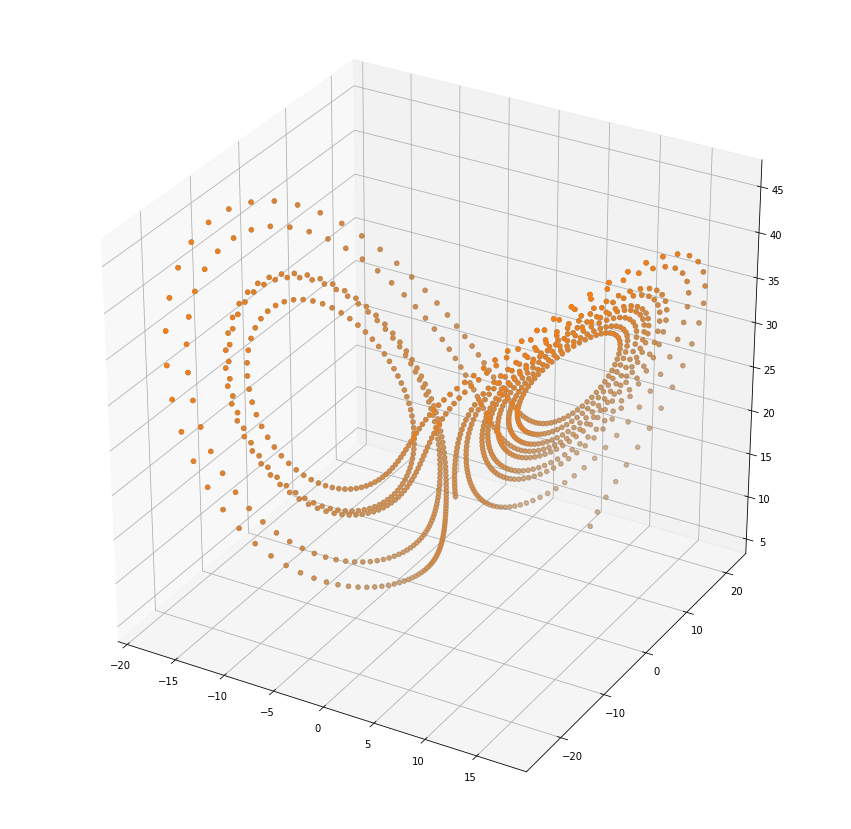

In [86]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
import numpy as np

plt.clf()
ax = plot_Lorenz([10,10,10], 10, 28, 8/3)
plot_Lorenz([10.00001, 10, 10], 10, 28, 8/3, ax)
plt.show()

These actually look pretty similar. So, the theory stands as of yet unconfirmed. Hm.

Let's change $\rho$ and see what that does.

<Figure size 432x288 with 0 Axes>

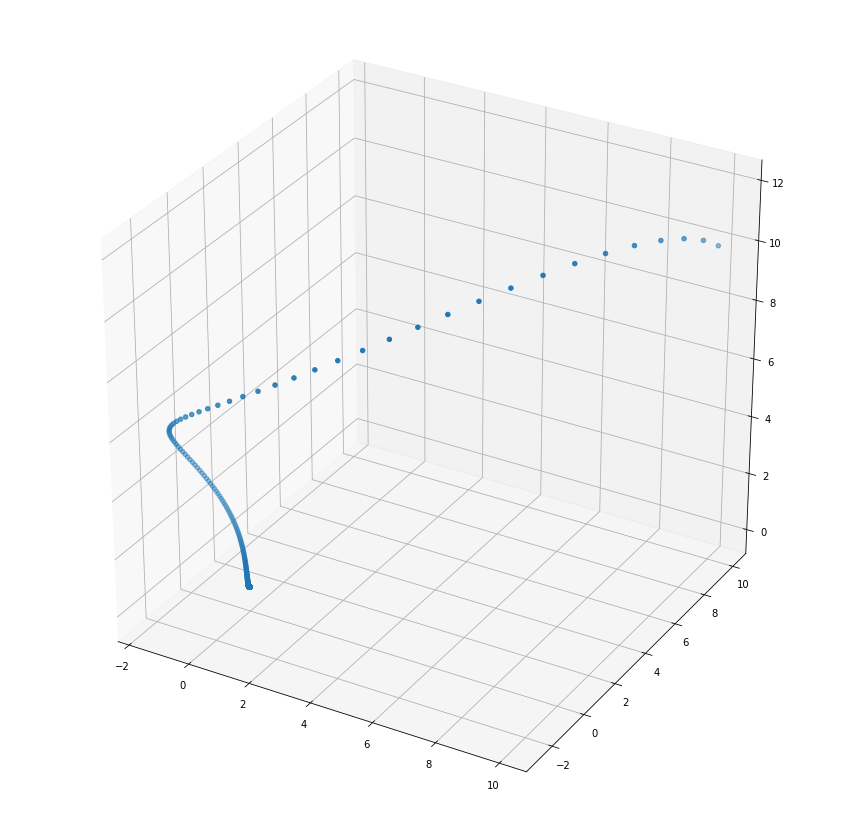

In [87]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
import numpy as np

plt.clf()
ax = plot_Lorenz([10,10,10,], 10, 0.5, 8/3)
plt.show()

Did it, like, change the hyperplane or something? It's just different now. May be, more iterations?

<Figure size 432x288 with 0 Axes>

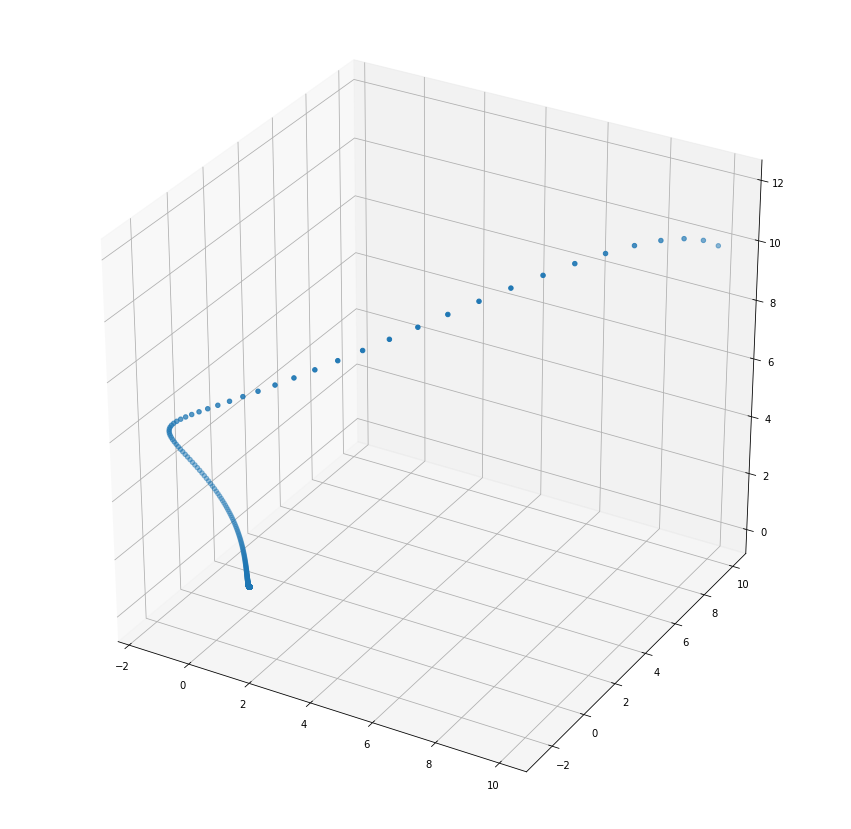

In [88]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
import numpy as np

plt.clf()
ax = plot_Lorenz([10,10,10,], 10, 0.5, 8/3, n_iter=10000)


Nope, it's just stuck.